# Определение надёжности стержня методом Монте-Карло (методом статистических испытаний)

In [2]:
#утсновка библиотек
!pip3 install seaborn
!pip3 install tqdm

     |████████████████████████████████| 63 kB 202 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
from numpy import random, max
import seaborn
from matplotlib.pyplot import *

import pandas as pd

from tqdm import tqdm

# Задача

На стальной стержень действует растягивающая сила со средним значением $\bar F = 100$ кН. Средний предел текучести стержня $\bar R_y$ - 230 МПа. Площадь поперечного сечения стержня - 5.36 см2

Если известны стандартные отклонения нагрузки F - 10 кН и предела текучести $R_y$ - 10 МПа определить запас несущей способности и вероятность безотказной работы стержня.

In [4]:
# определим функцию вычисляющую резерв несущей способности

def g_func(F, Ry, A):
    """ F:  сила в кН растягивающая стержень
    Ry - предел текучести стержня в МПа
    A - площадь поперечного сечения стержня в см2
    return: резерв несущей способности в кН
    """
    
    return Ry*A/10 - F

In [5]:
# пример вычисления резерва несущей способности
g_func(100, 230, 5.36)

23.280000000000015

## Статистические испытания

Рассмотрим другой, не аналитический, способ решения задач, где фигурируют случайные величины.

Будем *моделировать* задачу. 

1. Предположим, что случаные велечина F и Ry подчиняются нормальному закону распределения. Эксперименты показывают, что для прочности материалов это справедливо. Предположим также, что постоянная нагрузка F тоже имеет нормальное распределение. 

1. Теперь будем с помошью генератора случайных чисел создавать значения для F и Ry. Для каждой пары сгенерированных значений F и Ry будем просто вычислять резерв несущей способности. 
Проделаем так N раз, сгенерировав N значений случайных величин и вычислив N значений резерва несущей способности. Т.е. проведём N статистических испытаний. 

1. Таким образом мы как бы перебираем все возможные значения нагрузки и сопротивления, которые могут возникнуть в этой расчётной схеме. Чтоит отметить, что значения для случайных величин выбирается в соответствии с их параметрами (среднее и стандартное отклонение), т.е. эти числа хоть и произвольны но в ограниченом диапазоне.

1. подсчитаем сколько раз из N, резерв несущей способности g оказался больше нуля
1. определим вероятность неразрушения по формуле $ P = \frac{M}{N} $, где M - число раз когда g > 0

In [38]:
# средние значения случайных величин
Fav = 100  # кН
Ryav = 230  # МПа


# стандартные отклонения случайных величин
SF = 10  # кН
SRy = 10  # МПа

# постоянные величины задачи
A = 5.36  # см2


# количество статистических испытаний
N = 1000

# счётчик: число успешных испытаний (g>0)
M = 0

experiments = pd.DataFrame(columns=["F", "Ry", "g"])

# цикл повторяющий статистические испытания
for i in tqdm(range(N)):
    
    # генерирование нормально распределённых случайных величин
    # loc - математическое ожидание
    # scale - стандартное отклонение
    F = random.normal(loc=Fav, scale=SF)
    Ry = random.normal(loc=Ryav, scale=SRy)
    
    g = g_func(F, Ry, A)
    
    experiments.loc[i] = F, Ry, g 
    
    if g > 0:
        M = M + 1
    
# определение надёжности
P = M / N

# для примера напечатаем данные 20 случайных статистических испытаний
print("Некоторые статистические испытания")
print( experiments.sample(30) )

print()
print(f"Надёжность: {P:.5f}")

100%|██████████| 1000/1000 [00:04<00:00, 215.48it/s]

Некоторые статистические испытания
              F          Ry          g
282   82.081359  225.155226  38.601843
912  120.434599  230.574761   3.153473
608   89.113605  250.930754  45.385279
951  126.761808  221.763370  -7.896642
702   94.748696  228.649977  27.807692
604   89.867335  245.215783  41.568324
845   80.611558  234.687049  45.180700
13   108.250151  225.406693  12.567837
394  126.867540  230.288142  -3.433096
583  106.456886  230.413330  17.044659
633   89.898361  224.281209  30.316367
432   99.015230  237.909232  28.504118
158  111.538049  225.763230   9.471043
736  102.534545  230.718213  21.130417
841   94.348857  256.776508  43.283351
988  101.605523  229.184188  21.237202
562   94.038910  228.465866  28.418795
448   88.270499  225.651444  32.678675
467   92.697591  220.762486  25.631102
437   92.716403  222.356454  26.466656
310  122.260586  232.466453   2.341433
843  110.833530  225.464705  10.015551
619  105.505479  223.467264  14.272975
286   95.819005  213.116466  

Код в ячейке выше нужно запустить несколько раз, чтобы убедится в устойчивости ответа. Если от запуска к запуску ответ сильно меняется (в третьем знаке или раньше), то его считаем неустойчивым.

В этом случае нужно увеличить число испытаний N. Рекомендуется увеличивать на порядок или меньше.

Можно выбрать и большое число статистических испытаний, чтобы ответ не менялся и в четвёртом знаке после запятой, но проведения такого числа испытаний это может потребовать много времени.


**Примечание**

Для определения N при котором ответ достаточно устойчив можно сделать из верхней ячейки отдельную функцию с параметром N. Далее перебором, постепенно увеличивая N найти определить момент, когда ответ перестаёт сильно изменятся

### Визуализация

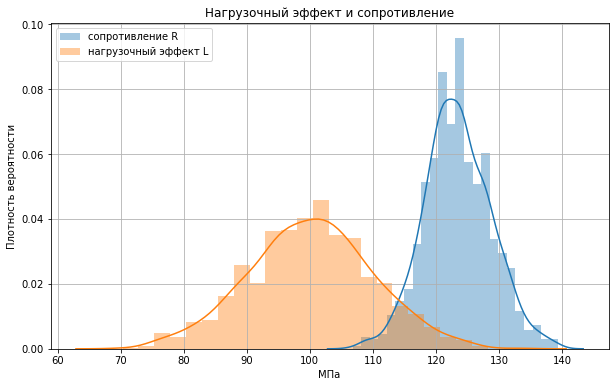

In [36]:
figure(figsize=(10,6))
title("Нагрузочный эффект и сопротивление")
seaborn.distplot( experiments['Ry']*A/10, label ="сопротивление R" )
seaborn.distplot( experiments['F'], label="нагрузочный эффект L" )
xlabel("МПа")
ylabel("Плотность вероятности")
grid()
legend(loc='best')

**Пример** графиков нагрузочного эффекта и сопротивления.

Для системы с надёжностью больше 0.5 распределение нагрузочного эффекта должно быть левее нагрузочного эффекта. Т.е. среднее сопротивление должно быть больше среднего нагрузочного эффекта.

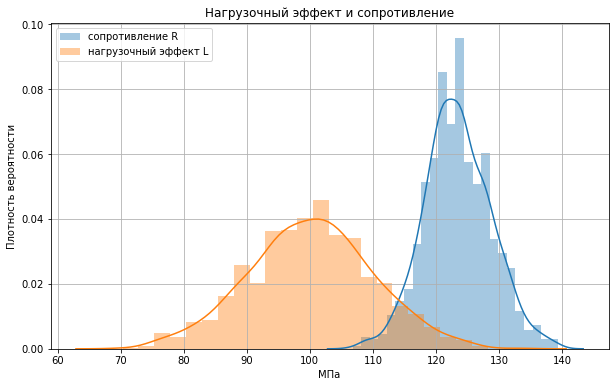